In [1]:
import os
import pandas as pd
import numpy as np
import tsfel
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
data.drop(['Unnamed: 0'],axis=1, inplace = True)

In [4]:
data

,Indivíduo,acc_x|0_Absolute energy,acc_x|0_Area under the curve,acc_x|0_Autocorrelation,acc_x|0_Centroid,acc_x|0_ECDF Percentile Count_0,acc_x|0_ECDF Percentile Count_1,acc_x|0_ECDF Percentile_0,acc_x|0_ECDF Percentile_1,acc_x|0_ECDF_0,...,gyro_z|0_Wavelet variance_1,gyro_z|0_Wavelet variance_2,gyro_z|0_Wavelet variance_3,gyro_z|0_Wavelet variance_4,gyro_z|0_Wavelet variance_5,gyro_z|0_Wavelet variance_6,gyro_z|0_Wavelet variance_7,gyro_z|0_Wavelet variance_8,gyro_z|0_Zero crossing rate,Label
0,2,5320.491272,6.562297,5320.491272,0.409357,16,66,-8.007659,-7.990839,0.012048,...,0.000036,0.000044,0.000029,0.000020,0.000019,0.000020,0.000020,0.000019,15,3
1,2,6245.195696,7.110730,6245.195696,0.410753,16,66,-8.712610,-8.645501,0.012048,...,0.000009,0.000019,0.000036,0.000049,0.000055,0.000052,0.000045,0.000037,10,3
2,2,6697.900953,7.363813,6697.900953,0.410550,16,66,-9.004519,-8.957186,0.012048,...,0.000464,0.000761,0.000725,0.000530,0.000330,0.000190,0.000117,0.000090,12,3
3,2,6356.469665,7.132471,6356.469665,0.404750,16,65,-8.837230,-8.783095,0.012195,...,0.000544,0.001199,0.002038,0.002690,0.002976,0.003056,0.003149,0.003339,12,3
4,2,6309.032331,7.149305,6309.032331,0.410488,16,66,-8.739024,-8.703359,0.012048,...,0.000021,0.000030,0.000036,0.000032,0.000030,0.000034,0.000040,0.000049,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,6469.281399,7.226016,6469.281399,0.383428,16,66,-9.355700,-8.120717,0.012048,...,0.000101,0.000332,0.000702,0.001195,0.001737,0.002218,0.002560,0.002749,9,0
97,1,6288.407021,7.117608,6288.407021,0.378383,16,66,-9.353114,-7.931873,0.012048,...,0.000125,0.000233,0.000334,0.000453,0.000591,0.000762,0.000991,0.001285,9,0
98,1,6245.405417,7.098627,6245.405417,0.381963,16,66,-9.284309,-8.099550,0.012048,...,0.000179,0.000423,0.000617,0.000875,0.001299,0.001865,0.002519,0.003201,5,0
99,1,6571.661627,7.285569,6571.661627,0.385950,16,66,-9.322222,-8.192425,0.012048,...,0.000214,0.000697,0.001293,0.001707,0.001846,0.001849,0.001890,0.002029,14,0


__Label Key__

0 - back

1 - front

2 - left

3 - still

4 - right

In [ ]:
features = ['acc_y|0_Mean','acc_y|0_Histogram_0','acc_y|0_Median','acc_y|0_Wavelet standard deviation_7', \
'acc_y|0_Wavelet variance_7','acc_z|0_Slope','gyro_z|0_Mean','gyro_z|0_Histogram_6','gyro_y|0_ECDF Percentile_1', \
'gyro_y|0_Interquartile range','gyro_y|0_Mean','gyro_y|0_Histogram_3','acc_y|0_Mean absolute deviation', \
'acc_z|0_Mean absolute deviation', 'gyro_y|0_Wavelet energy_5', 'gyro_y|0_Wavelet standard deviation_5', \
'gyro_y|0_Wavelet variance_5','acc_y|0_Wavelet standard deviation_6','acc_y|0_Wavelet variance_6','gyro_y|0_Spectral distance']
features[0:10]

In [5]:
features = ['acc_y|0_Mean','acc_y|0_Histogram_0','acc_y|0_Median','acc_y|0_Wavelet standard deviation_7', \
'acc_y|0_Wavelet variance_7','acc_z|0_Slope','gyro_z|0_Mean','gyro_z|0_Histogram_6','gyro_y|0_ECDF Percentile_1', \
'gyro_y|0_Interquartile range','gyro_y|0_Mean','gyro_y|0_Histogram_3','acc_y|0_Mean absolute deviation', \
'acc_z|0_Mean absolute deviation', 'gyro_y|0_Wavelet energy_5', 'gyro_y|0_Wavelet standard deviation_5', \
'gyro_y|0_Wavelet variance_5','acc_y|0_Wavelet standard deviation_6','acc_y|0_Wavelet variance_6','gyro_y|0_Spectral distance']

n_features = 10

X_data = data[features[0:n_features]]

X_data_acc = data[['acc_y|0_Mean','acc_y|0_Histogram_0','acc_y|0_Median','acc_y|0_Wavelet standard deviation_7', \
'acc_y|0_Wavelet variance_7','acc_z|0_Slope','acc_y|0_Mean absolute deviation', \
'acc_z|0_Mean absolute deviation','acc_y|0_Wavelet standard deviation_6','acc_y|0_Wavelet variance_6']]

X_data_gyro = data[['gyro_z|0_Mean','gyro_z|0_Histogram_6','gyro_y|0_ECDF Percentile_1', \
'gyro_y|0_Interquartile range','gyro_y|0_Mean','gyro_y|0_Histogram_3','gyro_y|0_Wavelet energy_5', \
'gyro_y|0_Wavelet standard deviation_5','gyro_y|0_Wavelet variance_5','gyro_y|0_Spectral distance']]

y_data = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, stratify = y_data) 
# 'stratify' ensures that train group is representative of the data by maintaing the percentage of each label

In [6]:
X_train

,acc_y|0_Mean,acc_y|0_Histogram_0,acc_y|0_Median,acc_y|0_Wavelet standard deviation_7,acc_y|0_Wavelet variance_7,acc_z|0_Slope,gyro_z|0_Mean,gyro_z|0_Histogram_6,gyro_y|0_ECDF Percentile_1,gyro_y|0_Interquartile range
21,0.818579,0,0.918180,0.434997,0.189222,-0.104321,-0.010838,0,0.318523,0.212344
1,-0.491915,0,-0.488476,0.287122,0.082439,-0.001296,-0.000580,0,0.005269,0.007631
43,3.662602,0,4.923181,3.433010,11.785560,-0.031482,0.091136,13,0.052863,0.053676
23,0.214383,0,0.266889,0.355667,0.126499,0.079527,-0.003942,0,-0.032516,0.197745
69,-0.195088,0,-0.052088,0.541834,0.293584,-0.112936,-0.010305,0,0.344724,0.266022
...,...,...,...,...,...,...,...,...,...,...
47,2.915067,0,3.314898,2.929047,8.579316,-0.013149,0.072183,10,0.046999,0.080674
89,-2.775435,2,-2.933941,2.807034,7.879438,-0.003808,-0.099518,0,0.027386,0.030502
85,-2.930970,2,-3.676193,2.740259,7.509018,0.001606,-0.092380,0,0.009086,0.026367
98,0.076812,0,0.228714,0.434636,0.188908,0.099550,0.004676,0,0.005134,0.253893


In [7]:
X_train.index

Int64Index([ 21,   1,  43,  23,  69,  31,  57,  50,  76,  56, 100,   2,  53,
             92,  99,  75,   8,  54,  19,  52,  22,  94,  68,  17,  87,  64,
             81,  96,   3,  90,  29,  24,  71,  49,  88,  34,  62,  73,  48,
             13,  40,  35,   4,  93,  63,  25,  51,  82,  72,  12,  16,  38,
             46,  86,  55,   0,  42,  79,   5,  33,  58,  11,  15,  30,  61,
             47,  89,  85,  98,  27],
           dtype='int64')

In [8]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_test_gnb = gnb.predict(X_test)
y_train_gnb = gnb.predict(X_train)
y_test_gnb_proba = gnb.predict_proba(X_test)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5)
rf.fit(X_train, y_train)
y_test_rf = rf.predict(X_test)
y_train_rf = rf.predict(X_train)
y_test_rf_proba = rf.predict_proba(X_test)

from sklearn.svm import SVC

svc = SVC(probability = True)
svc.fit(X_train, y_train)
y_test_svc = svc.predict(X_test)
y_train_svc = svc.predict(X_train)
y_test_svc_proba = svc.predict_proba(X_test)

### Support Vector Classifier

 Train Group 
 


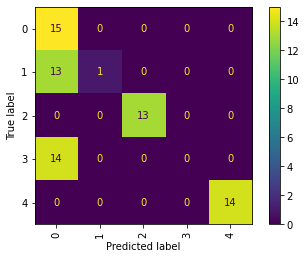

In [9]:
print('\033[1m Train Group \n \033[0m')
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svc, xticks_rotation="vertical")

 Test Group 
 


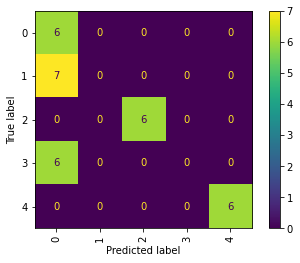

In [10]:
print('\033[1m Test Group \n \033[0m')
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svc, xticks_rotation="vertical")

### Random Forest Classifier

 Train Group 
 


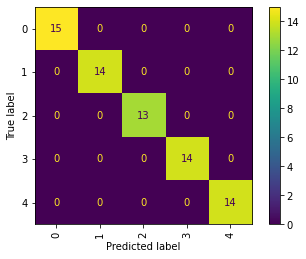

In [11]:
print('\033[1m Train Group \n \033[0m')
ConfusionMatrixDisplay.from_predictions(y_train, y_train_rf, xticks_rotation="vertical")

 Test Group 
 


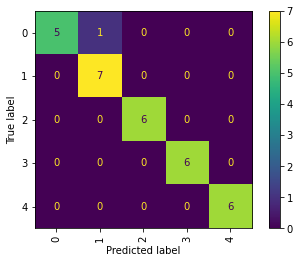

In [12]:
print('\033[1m Test Group \n \033[0m')
ConfusionMatrixDisplay.from_predictions(y_test, y_test_rf, xticks_rotation="vertical")

### Gaussian Naive Bayes

 Train Group 
 


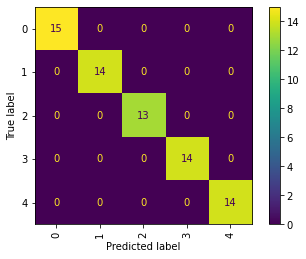

In [13]:
print('\033[1m Train Group \n \033[0m')
ConfusionMatrixDisplay.from_predictions(y_train, y_train_gnb, xticks_rotation="vertical")

 Test Group 
 


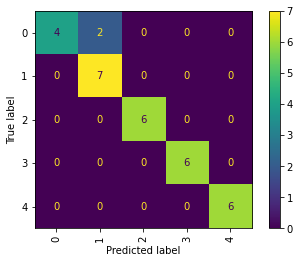

In [14]:
print('\033[1m Test Group \n \033[0m')
ConfusionMatrixDisplay.from_predictions(y_test, y_test_gnb, xticks_rotation="vertical")

## Performance Metrics

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [16]:
def metrics(y_train, y_test, y_train_pred, y_test_pred): 
       
    acc_test = accuracy_score(y_test, y_test_pred)
    acc_train = accuracy_score(y_train, y_train_pred)
    
    prec_test = precision_score(y_test, y_test_pred, average = 'micro')
    prec_train = precision_score(y_train, y_train_pred, average = 'micro')
        
    recall_test = recall_score(y_test, y_test_pred, average = 'micro')
    recall_train = recall_score(y_train, y_train_pred, average = 'micro')    
        
    f1_test = f1_score(y_test, y_test_pred, average = 'micro')
    f1_train = f1_score(y_train, y_train_pred, average = 'micro')
    
    return [acc_test,acc_train,prec_test,prec_train,recall_test,recall_train,f1_test,f1_train]      

In [17]:
perf= pd.DataFrame()
perf['Support Vector Machine'] = metrics(y_train, y_test, y_train_svc, y_test_svc)
perf['Random Forest'] = metrics(y_train, y_test, y_train_rf, y_test_rf)
perf['Gaussian Naive Bayes'] = metrics(y_train, y_test, y_train_gnb, y_test_gnb)
perf['Metric'] = ['acc_test','acc_train','prec_test','prec_train','recall_test','recall_train','f1_test','f1_train']
perf.set_index(['Metric'],inplace=True)

In [18]:
perf.style.highlight_max(axis = 1, color = 'lightgreen')

,Support Vector Machine,Random Forest,Gaussian Naive Bayes
Metric,,,
acc_test,0.580645,0.967742,0.935484
acc_train,0.614286,1.000000,1.000000
prec_test,0.580645,0.967742,0.935484
prec_train,0.614286,1.000000,1.000000
recall_test,0.580645,0.967742,0.935484
recall_train,0.614286,1.000000,1.000000
f1_test,0.580645,0.967742,0.935484
f1_train,0.614286,1.000000,1.000000


## ROC Curve

In [19]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

In [20]:
y_test_b = [ 1 if y_test.values[i] == 0 else 0 for i in range(len(y_test))]
y_test_f = [ 1 if y_test.values[i] == 1 else 0 for i in range(len(y_test))]
y_test_l = [ 1 if y_test.values[i] == 2 else 0 for i in range(len(y_test))]
y_test_o = [ 1 if y_test.values[i] == 3 else 0 for i in range(len(y_test))]
y_test_r = [ 1 if y_test.values[i] == 4 else 0 for i in range(len(y_test))]

### Support Vector Machine

##### Still

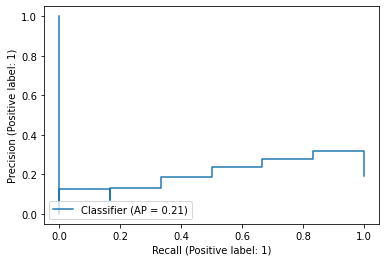

In [21]:
precisions, recalls, thresholds = precision_recall_curve(y_test_o, y_test_svc_proba[:,3])
PrecisionRecallDisplay.from_predictions(y_test_o, y_test_svc_proba[:,3])

#### Back

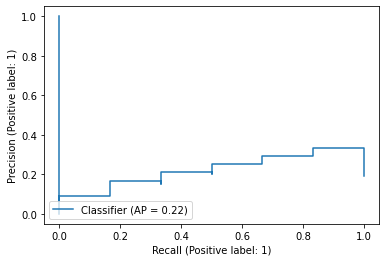

In [22]:
precisions, recalls, thresholds = precision_recall_curve(y_test_b, y_test_svc_proba[:,0])
PrecisionRecallDisplay.from_predictions(y_test_b, y_test_svc_proba[:,0])

#### Front

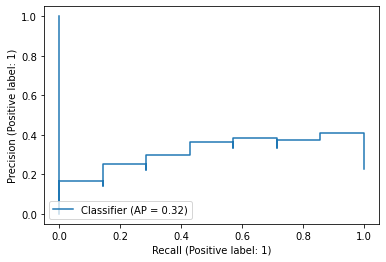

In [23]:
precisions, recalls, thresholds = precision_recall_curve(y_test_f, y_test_svc_proba[:,1])
PrecisionRecallDisplay.from_predictions(y_test_f, y_test_svc_proba[:,1])

#### Left

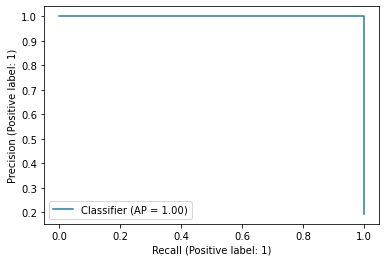

In [24]:
precisions, recalls, thresholds = precision_recall_curve(y_test_l, y_test_svc_proba[:,2])
PrecisionRecallDisplay.from_predictions(y_test_l, y_test_svc_proba[:,2])

#### Right

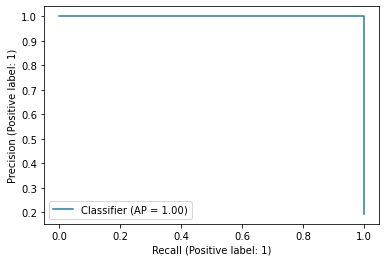

In [25]:
precisions, recalls, thresholds = precision_recall_curve(y_test_r, y_test_svc_proba[:,4])
PrecisionRecallDisplay.from_predictions(y_test_r, y_test_svc_proba[:,4])

### Random Forest

##### Still

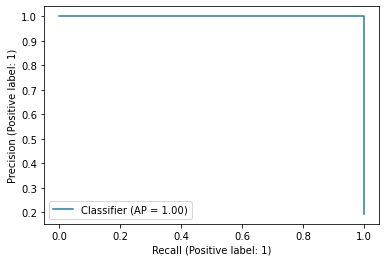

In [26]:
precisions, recalls, thresholds = precision_recall_curve(y_test_o, y_test_rf_proba[:,3])
PrecisionRecallDisplay.from_predictions(y_test_o, y_test_rf_proba[:,3])

#### Back

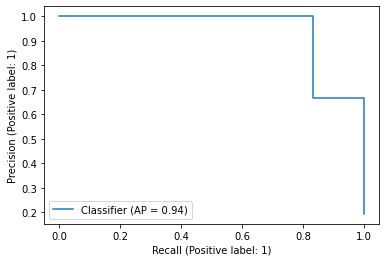

In [27]:
precisions, recalls, thresholds = precision_recall_curve(y_test_b, y_test_rf_proba[:,0])
PrecisionRecallDisplay.from_predictions(y_test_b, y_test_rf_proba[:,0])

#### Front

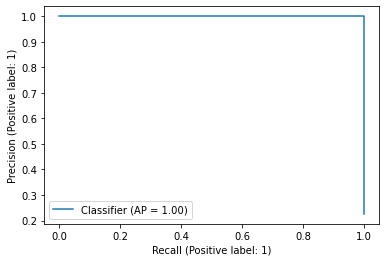

In [28]:
precisions, recalls, thresholds = precision_recall_curve(y_test_f, y_test_rf_proba[:,1])
PrecisionRecallDisplay.from_predictions(y_test_f, y_test_rf_proba[:,1])

#### Left

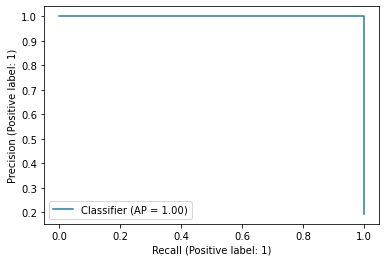

In [29]:
precisions, recalls, thresholds = precision_recall_curve(y_test_l, y_test_rf_proba[:,2])
PrecisionRecallDisplay.from_predictions(y_test_l, y_test_rf_proba[:,2])

#### Right

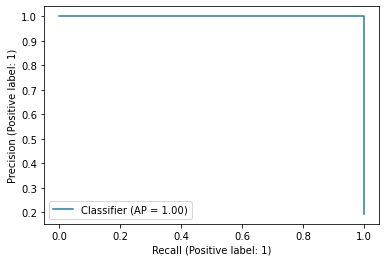

In [30]:
precisions, recalls, thresholds = precision_recall_curve(y_test_r, y_test_rf_proba[:,4])
PrecisionRecallDisplay.from_predictions(y_test_r, y_test_rf_proba[:,4])

### Gaussian Naive Bayes

##### Still

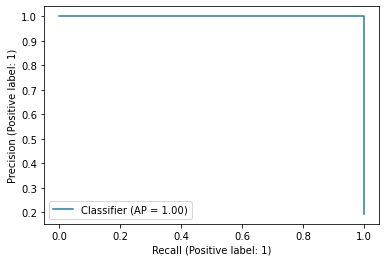

In [31]:
precisions, recalls, thresholds = precision_recall_curve(y_test_o, y_test_gnb_proba[:,3])
PrecisionRecallDisplay.from_predictions(y_test_o, y_test_gnb_proba[:,3])

#### Back

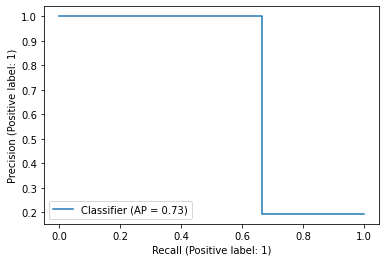

In [32]:
precisions, recalls, thresholds = precision_recall_curve(y_test_b, y_test_gnb_proba[:,0])
PrecisionRecallDisplay.from_predictions(y_test_b, y_test_gnb_proba[:,0])

#### Front

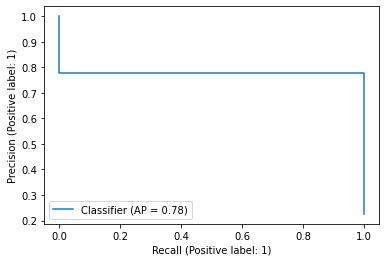

In [33]:
precisions, recalls, thresholds = precision_recall_curve(y_test_f, y_test_gnb_proba[:,1])
PrecisionRecallDisplay.from_predictions(y_test_f, y_test_gnb_proba[:,1])

#### Left

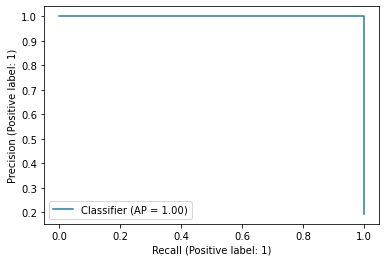

In [34]:
precisions, recalls, thresholds = precision_recall_curve(y_test_l, y_test_gnb_proba[:,2])
PrecisionRecallDisplay.from_predictions(y_test_l, y_test_gnb_proba[:,2])

#### Right

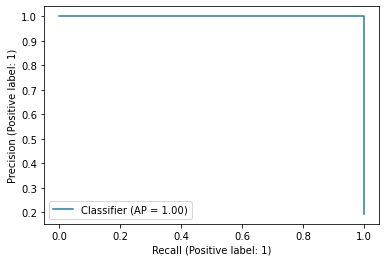

In [35]:
precisions, recalls, thresholds = precision_recall_curve(y_test_r, y_test_gnb_proba[:,4])
PrecisionRecallDisplay.from_predictions(y_test_r, y_test_gnb_proba[:,4])

# Exportar Modelo Escolhido ( Gaussian Naive Bayes )

In [37]:
import joblib

In [39]:
gnb = GaussianNB()
gnb.fit(X_data, y_data)

filename = 'gnb_model.sav'
joblib.dump(gnb, filename)

['gnb_model.sav']